In [ ]:
import numpy as np
import pandas as pd

positive_df = pd.read_excel('./아모레퍼시픽_긍정단어기사_네이버데이터랩.xlsx')
negative_df = pd.read_excel('./아모레퍼시픽_부정단어기사_네이버데이터랩.xlsx')
positive_df

,날짜,긍정 빈도
0,2017-10-03,9.43603
1,2017-10-04,7.62035
2,2017-10-05,8.26226
3,2017-10-06,10.72902
4,2017-10-07,10.38055
...,...,...
2187,2023-09-29,10.10545
2188,2023-09-30,10.42640
2189,2023-10-01,11.44429
2190,2023-10-02,12.65474


In [ ]:
negative_df

,날짜,부정 빈도
0,2017-10-03,0.63796
1,2017-10-04,0.69122
2,2017-10-05,0.69870
3,2017-10-06,0.78980
4,2017-10-07,0.75687
...,...,...
2187,2023-09-29,0.33521
2188,2023-09-30,0.37072
2189,2023-10-01,0.39642
2190,2023-10-02,0.40740


In [ ]:
df = pd.merge(positive_df, negative_df, right_on='날짜', left_on='날짜')
df

,날짜,긍정 빈도,부정 빈도
0,2017-10-03,9.43603,0.63796
1,2017-10-04,7.62035,0.69122
2,2017-10-05,8.26226,0.69870
3,2017-10-06,10.72902,0.78980
4,2017-10-07,10.38055,0.75687
...,...,...,...
2187,2023-09-29,10.10545,0.33521
2188,2023-09-30,10.42640,0.37072
2189,2023-10-01,11.44429,0.39642
2190,2023-10-02,12.65474,0.40740


In [ ]:
df.to_csv('./아모레퍼시픽_긍부정.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2192 entries, 0 to 2191
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      2192 non-null   object 
 1   긍정 빈도   2192 non-null   float64
 2   부정 빈도   2192 non-null   float64
dtypes: float64(2), object(1)
memory usage: 68.5+ KB


In [ ]:
df['날짜'] = pd.to_datetime(df['날짜'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2192 entries, 0 to 2191
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      2192 non-null   datetime64[ns]
 1   긍정 빈도   2192 non-null   float64       
 2   부정 빈도   2192 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 68.5 KB


In [ ]:
df['po_ne_rate'] = df['긍정 빈도'] / df['부정 빈도']
df

,날짜,긍정 빈도,부정 빈도,po_ne_rate
0,2017-10-03,9.43603,0.63796,14.790943
1,2017-10-04,7.62035,0.69122,11.024493
2,2017-10-05,8.26226,0.69870,11.825190
3,2017-10-06,10.72902,0.78980,13.584477
4,2017-10-07,10.38055,0.75687,13.715103
...,...,...,...,...
2187,2023-09-29,10.10545,0.33521,30.146625
2188,2023-09-30,10.42640,0.37072,28.124730
2189,2023-10-01,11.44429,0.39642,28.869103
2190,2023-10-02,12.65474,0.40740,31.062199


In [ ]:
df.rename(columns = {'날짜' : 'date', '긍정 빈도' : 'positive', '부정 빈도' : 'negative'}, inplace=True)
df

,date,positive,negative,po_ne_rate
0,2017-10-03,9.43603,0.63796,14.790943
1,2017-10-04,7.62035,0.69122,11.024493
2,2017-10-05,8.26226,0.69870,11.825190
3,2017-10-06,10.72902,0.78980,13.584477
4,2017-10-07,10.38055,0.75687,13.715103
...,...,...,...,...
2187,2023-09-29,10.10545,0.33521,30.146625
2188,2023-09-30,10.42640,0.37072,28.124730
2189,2023-10-01,11.44429,0.39642,28.869103
2190,2023-10-02,12.65474,0.40740,31.062199


In [ ]:
df.to_csv('./아모레퍼시픽_긍부정.xlsx')

In [ ]:
!pip install finance-datareader
!pip install pykrx
!pip install pandas_datareader
!pip install yfinance

In [ ]:
import FinanceDataReader as fdr
from pykrx import stock
import pandas_datareader.data as pdr
import yfinance as yf

In [ ]:
# 아모레퍼시픽 : 090430
# 노랑풍선 : 104620
# 하나투어 : 039130

In [ ]:
start_date = '2017-10-03'
end_date = '2023-10-03'

amore = fdr.DataReader('090430', start=start_date, end=end_date)
amore

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-10-10,259500,265000,256500,261500,553226,0.007707
2017-10-11,259000,260500,256500,259000,249487,-0.009560
2017-10-12,258000,262000,254500,254500,179632,-0.017375
2017-10-13,256000,273000,253500,271000,681271,0.064833
2017-10-16,273500,286000,271000,285000,581424,0.051661
...,...,...,...,...,...,...
2023-09-21,123500,124200,121700,122600,126722,-0.008892
2023-09-22,121600,122000,119000,121800,97100,-0.006525
2023-09-25,121800,125600,121100,124900,194926,0.025452


In [ ]:
amore = amore.reset_index()
amore

,Date,Open,High,Low,Close,Volume,Change
0,2017-10-10,259500,265000,256500,261500,553226,0.007707
1,2017-10-11,259000,260500,256500,259000,249487,-0.009560
2,2017-10-12,258000,262000,254500,254500,179632,-0.017375
3,2017-10-13,256000,273000,253500,271000,681271,0.064833
4,2017-10-16,273500,286000,271000,285000,581424,0.051661
...,...,...,...,...,...,...,...
1469,2023-09-21,123500,124200,121700,122600,126722,-0.008892
1470,2023-09-22,121600,122000,119000,121800,97100,-0.006525
1471,2023-09-25,121800,125600,121100,124900,194926,0.025452
1472,2023-09-26,123300,124500,121100,122500,153382,-0.019215


In [ ]:
amore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1474 non-null   datetime64[ns]
 1   Open    1474 non-null   int64         
 2   High    1474 non-null   int64         
 3   Low     1474 non-null   int64         
 4   Close   1474 non-null   int64         
 5   Volume  1474 non-null   int64         
 6   Change  1474 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 80.7 KB


In [ ]:
raw_df = pd.merge(df, amore, left_on='date', right_on='Date')
raw_df

,date,positive,negative,po_ne_rate,Date,Open,High,Low,Close,Volume,Change
0,2017-10-10,20.10087,1.24346,16.165273,2017-10-10,259500,265000,256500,261500,553226,0.007707
1,2017-10-11,21.11875,1.25047,16.888650,2017-10-11,259000,260500,256500,259000,249487,-0.009560
2,2017-10-12,21.01788,1.24369,16.899613,2017-10-12,258000,262000,254500,254500,179632,-0.017375
3,2017-10-13,18.11095,1.33386,13.577849,2017-10-13,256000,273000,253500,271000,681271,0.064833
4,2017-10-16,21.09124,1.73005,12.191116,2017-10-16,273500,286000,271000,285000,581424,0.051661
...,...,...,...,...,...,...,...,...,...,...,...
1469,2023-09-21,21.74232,1.41609,15.353770,2023-09-21,123500,124200,121700,122600,126722,-0.008892
1470,2023-09-22,19.80742,0.96968,20.426759,2023-09-22,121600,122000,119000,121800,97100,-0.006525
1471,2023-09-25,21.55891,0.91315,23.609385,2023-09-25,121800,125600,121100,124900,194926,0.025452
1472,2023-09-26,20.98120,0.96664,21.705288,2023-09-26,123300,124500,121100,122500,153382,-0.019215


In [ ]:
raw_df.drop('Date', axis=1, inplace=True)
raw_df

,date,positive,negative,po_ne_rate,Open,High,Low,Close,Volume,Change
0,2017-10-10,20.10087,1.24346,16.165273,259500,265000,256500,261500,553226,0.007707
1,2017-10-11,21.11875,1.25047,16.888650,259000,260500,256500,259000,249487,-0.009560
2,2017-10-12,21.01788,1.24369,16.899613,258000,262000,254500,254500,179632,-0.017375
3,2017-10-13,18.11095,1.33386,13.577849,256000,273000,253500,271000,681271,0.064833
4,2017-10-16,21.09124,1.73005,12.191116,273500,286000,271000,285000,581424,0.051661
...,...,...,...,...,...,...,...,...,...,...
1469,2023-09-21,21.74232,1.41609,15.353770,123500,124200,121700,122600,126722,-0.008892
1470,2023-09-22,19.80742,0.96968,20.426759,121600,122000,119000,121800,97100,-0.006525
1471,2023-09-25,21.55891,0.91315,23.609385,121800,125600,121100,124900,194926,0.025452
1472,2023-09-26,20.98120,0.96664,21.705288,123300,124500,121100,122500,153382,-0.019215


In [ ]:
raw_df.to_csv('./raw_df.csv')

In [ ]:
df = raw_df.copy(deep=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 1473
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1474 non-null   datetime64[ns]
 1   positive    1474 non-null   float64       
 2   negative    1474 non-null   float64       
 3   po_ne_rate  1474 non-null   float64       
 4   Open        1474 non-null   int64         
 5   High        1474 non-null   int64         
 6   Low         1474 non-null   int64         
 7   Close       1474 non-null   int64         
 8   Volume      1474 non-null   int64         
 9   Change      1474 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 126.7 KB


In [ ]:
!pip install pygwalker

     ---------------------------------------- 1.2/1.2 MB 6.5 MB/s eta 0:00:00
     -------------------------------------- 315.0/315.0 kB 9.8 MB/s eta 0:00:00
     ---------------------------------------- 10.3/10.3 MB 7.5 MB/s eta 0:00:00
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
     ------------------------------------- 964.4/964.4 kB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 10.3 MB/s eta 0:00:00


In [ ]:
import pygwalker as pyg

In [ ]:
raw_df.set_index(raw_df['date'], inplace=True)

,date,positive,negative,po_ne_rate,Open,High,Low,Close,Volume,Change
date,,,,,,,,,,
2017-10-10,2017-10-10,20.10087,1.24346,16.165273,259500,265000,256500,261500,553226,0.007707
2017-10-11,2017-10-11,21.11875,1.25047,16.888650,259000,260500,256500,259000,249487,-0.009560
2017-10-12,2017-10-12,21.01788,1.24369,16.899613,258000,262000,254500,254500,179632,-0.017375
2017-10-13,2017-10-13,18.11095,1.33386,13.577849,256000,273000,253500,271000,681271,0.064833
2017-10-16,2017-10-16,21.09124,1.73005,12.191116,273500,286000,271000,285000,581424,0.051661
...,...,...,...,...,...,...,...,...,...,...
2023-09-21,2023-09-21,21.74232,1.41609,15.353770,123500,124200,121700,122600,126722,-0.008892
2023-09-22,2023-09-22,19.80742,0.96968,20.426759,121600,122000,119000,121800,97100,-0.006525
2023-09-25,2023-09-25,21.55891,0.91315,23.609385,121800,125600,121100,124900,194926,0.025452


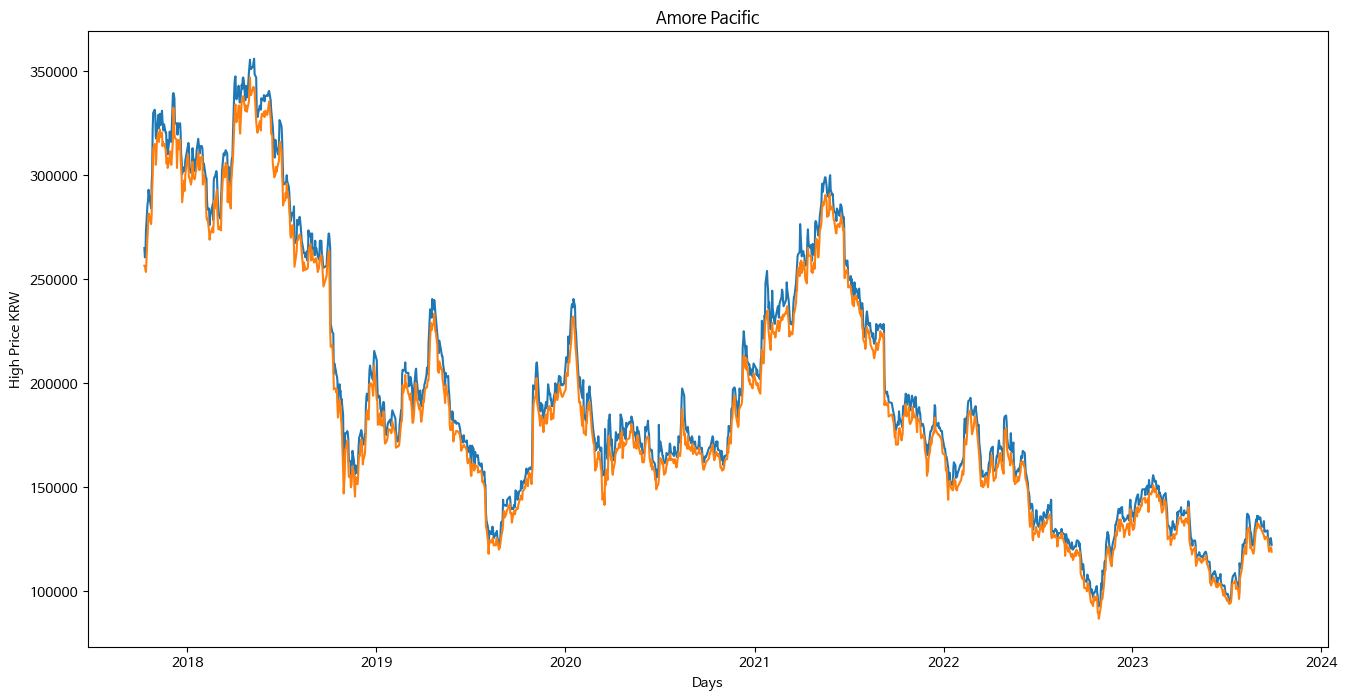

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.title('Amore Pacific')
plt.xlabel('Days')
plt.ylabel('High Price KRW')
plt.plot(raw_df['High'])
plt.plot(raw_df['Low'])
plt.show()

In [ ]:
raw_df

,date,positive,negative,po_ne_rate,Open,High,Low,Close,Volume,Change
date,,,,,,,,,,
2017-10-10,2017-10-10,20.10087,1.24346,16.165273,259500,265000,256500,261500,553226,0.007707
2017-10-11,2017-10-11,21.11875,1.25047,16.888650,259000,260500,256500,259000,249487,-0.009560
2017-10-12,2017-10-12,21.01788,1.24369,16.899613,258000,262000,254500,254500,179632,-0.017375
2017-10-13,2017-10-13,18.11095,1.33386,13.577849,256000,273000,253500,271000,681271,0.064833
2017-10-16,2017-10-16,21.09124,1.73005,12.191116,273500,286000,271000,285000,581424,0.051661
...,...,...,...,...,...,...,...,...,...,...
2023-09-21,2023-09-21,21.74232,1.41609,15.353770,123500,124200,121700,122600,126722,-0.008892
2023-09-22,2023-09-22,19.80742,0.96968,20.426759,121600,122000,119000,121800,97100,-0.006525
2023-09-25,2023-09-25,21.55891,0.91315,23.609385,121800,125600,121100,124900,194926,0.025452


In [ ]:
gwalker_amore = pyg.walk(raw_df)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

In [ ]:
df

,date,positive,negative,po_ne_rate,Open,High,Low,Close,Volume,Change
0,2017-10-10,20.10087,1.24346,16.165273,259500,265000,256500,261500,553226,0.007707
1,2017-10-11,21.11875,1.25047,16.888650,259000,260500,256500,259000,249487,-0.009560
2,2017-10-12,21.01788,1.24369,16.899613,258000,262000,254500,254500,179632,-0.017375
3,2017-10-13,18.11095,1.33386,13.577849,256000,273000,253500,271000,681271,0.064833
4,2017-10-16,21.09124,1.73005,12.191116,273500,286000,271000,285000,581424,0.051661
...,...,...,...,...,...,...,...,...,...,...
1469,2023-09-21,21.74232,1.41609,15.353770,123500,124200,121700,122600,126722,-0.008892
1470,2023-09-22,19.80742,0.96968,20.426759,121600,122000,119000,121800,97100,-0.006525
1471,2023-09-25,21.55891,0.91315,23.609385,121800,125600,121100,124900,194926,0.025452
1472,2023-09-26,20.98120,0.96664,21.705288,123300,124500,121100,122500,153382,-0.019215


In [ ]:
df_filter = raw_df['Close'].pct_change() * 100

In [ ]:
df_filter.rename('today', inplace=True)

date
2017-10-10         NaN
2017-10-11   -0.956023
2017-10-12   -1.737452
2017-10-13    6.483301
2017-10-16    5.166052
                ...   
2023-09-21   -0.889248
2023-09-22   -0.652529
2023-09-25    2.545156
2023-09-26   -1.921537
2023-09-27   -0.408163
Name: today, Length: 1474, dtype: float64

In [ ]:
df_filter

date
2017-10-10         NaN
2017-10-11   -0.956023
2017-10-12   -1.737452
2017-10-13    6.483301
2017-10-16    5.166052
                ...   
2023-09-21   -0.889248
2023-09-22   -0.652529
2023-09-25    2.545156
2023-09-26   -1.921537
2023-09-27   -0.408163
Name: today, Length: 1474, dtype: float64

In [ ]:
df_filter = df_filter.reset_index()
df_filter

,date,today
0,2017-10-10,NaN
1,2017-10-11,-0.956023
2,2017-10-12,-1.737452
3,2017-10-13,6.483301
4,2017-10-16,5.166052
...,...,...
1469,2023-09-21,-0.889248
1470,2023-09-22,-0.652529
1471,2023-09-25,2.545156
1472,2023-09-26,-1.921537


In [ ]:
df_filter['Volume'] = df['Volume'].shift(1).values / 1000_000_000
df_filter

,date,today,Volume
0,2017-10-10,NaN,NaN
1,2017-10-11,-0.956023,0.000553
2,2017-10-12,-1.737452,0.000249
3,2017-10-13,6.483301,0.000180
4,2017-10-16,5.166052,0.000681
...,...,...,...
1469,2023-09-21,-0.889248,0.000138
1470,2023-09-22,-0.652529,0.000127
1471,2023-09-25,2.545156,0.000097
1472,2023-09-26,-1.921537,0.000195


In [ ]:
for i in range(1, 6):
    df_filter['Lag' + str(i)] = df_filter['today'].shift(i)

df_filter

,date,today,Volume,Lag1,Lag2,Lag3,Lag4,Lag5
0,2017-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-10-11,-0.956023,0.000553,NaN,NaN,NaN,NaN,NaN
2,2017-10-12,-1.737452,0.000249,-0.956023,NaN,NaN,NaN,NaN
3,2017-10-13,6.483301,0.000180,-1.737452,-0.956023,NaN,NaN,NaN
4,2017-10-16,5.166052,0.000681,6.483301,-1.737452,-0.956023,NaN,NaN
...,...,...,...,...,...,...,...,...
1469,2023-09-21,-0.889248,0.000138,-1.825397,-1.792673,-0.155642,1.260835,-0.314218
1470,2023-09-22,-0.652529,0.000127,-0.889248,-1.825397,-1.792673,-0.155642,1.260835
1471,2023-09-25,2.545156,0.000097,-0.652529,-0.889248,-1.825397,-1.792673,-0.155642
1472,2023-09-26,-1.921537,0.000195,2.545156,-0.652529,-0.889248,-1.825397,-1.792673


In [ ]:
df_filter['positive'] = df['positive'].shift(1).values
df_filter['negative'] = df['negative'].shift(1).values
df_filter['po_ne_rate'] = df['po_ne_rate'].shift(1).values
df_filter

,date,today,Volume,Lag1,Lag2,Lag3,Lag4,Lag5,positive,negative,po_ne_rate
0,2017-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-10-11,-0.956023,0.000553,NaN,NaN,NaN,NaN,NaN,20.10087,1.24346,16.165273
2,2017-10-12,-1.737452,0.000249,-0.956023,NaN,NaN,NaN,NaN,21.11875,1.25047,16.888650
3,2017-10-13,6.483301,0.000180,-1.737452,-0.956023,NaN,NaN,NaN,21.01788,1.24369,16.899613
4,2017-10-16,5.166052,0.000681,6.483301,-1.737452,-0.956023,NaN,NaN,18.11095,1.33386,13.577849
...,...,...,...,...,...,...,...,...,...,...,...
1469,2023-09-21,-0.889248,0.000138,-1.825397,-1.792673,-0.155642,1.260835,-0.314218,21.95323,1.28738,17.052642
1470,2023-09-22,-0.652529,0.000127,-0.889248,-1.825397,-1.792673,-0.155642,1.260835,21.74232,1.41609,15.353770
1471,2023-09-25,2.545156,0.000097,-0.652529,-0.889248,-1.825397,-1.792673,-0.155642,19.80742,0.96968,20.426759
1472,2023-09-26,-1.921537,0.000195,2.545156,-0.652529,-0.889248,-1.825397,-1.792673,21.55891,0.91315,23.609385


In [ ]:
df_filter.dropna(inplace=True)
df_filter

,date,today,Volume,Lag1,Lag2,Lag3,Lag4,Lag5,positive,negative,po_ne_rate
6,2017-10-18,-0.698080,0.000268,0.526316,5.166052,6.483301,-1.737452,-0.956023,19.58734,1.37872,14.206902
7,2017-10-19,0.702988,0.000274,-0.698080,0.526316,5.166052,6.483301,-1.737452,19.52315,1.31704,14.823506
8,2017-10-20,-2.094241,0.000149,0.702988,-0.698080,0.526316,5.166052,6.483301,20.34846,1.31751,15.444634
9,2017-10-23,0.178253,0.000106,-2.094241,0.702988,-0.698080,0.526316,5.166052,18.29436,1.17408,15.581868
10,2017-10-24,3.914591,0.000122,0.178253,-2.094241,0.702988,-0.698080,0.526316,19.66987,1.27500,15.427349
...,...,...,...,...,...,...,...,...,...,...,...
1469,2023-09-21,-0.889248,0.000138,-1.825397,-1.792673,-0.155642,1.260835,-0.314218,21.95323,1.28738,17.052642
1470,2023-09-22,-0.652529,0.000127,-0.889248,-1.825397,-1.792673,-0.155642,1.260835,21.74232,1.41609,15.353770
1471,2023-09-25,2.545156,0.000097,-0.652529,-0.889248,-1.825397,-1.792673,-0.155642,19.80742,0.96968,20.426759
1472,2023-09-26,-1.921537,0.000195,2.545156,-0.652529,-0.889248,-1.825397,-1.792673,21.55891,0.91315,23.609385


In [ ]:
df_filter['Direction'] = [1 if i > 0 else 0 for i in df_filter['today']]
df_filter

,date,today,Volume,Lag1,Lag2,Lag3,Lag4,Lag5,positive,negative,po_ne_rate,Direction
6,2017-10-18,-0.698080,0.000268,0.526316,5.166052,6.483301,-1.737452,-0.956023,19.58734,1.37872,14.206902,0
7,2017-10-19,0.702988,0.000274,-0.698080,0.526316,5.166052,6.483301,-1.737452,19.52315,1.31704,14.823506,1
8,2017-10-20,-2.094241,0.000149,0.702988,-0.698080,0.526316,5.166052,6.483301,20.34846,1.31751,15.444634,0
9,2017-10-23,0.178253,0.000106,-2.094241,0.702988,-0.698080,0.526316,5.166052,18.29436,1.17408,15.581868,1
10,2017-10-24,3.914591,0.000122,0.178253,-2.094241,0.702988,-0.698080,0.526316,19.66987,1.27500,15.427349,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1469,2023-09-21,-0.889248,0.000138,-1.825397,-1.792673,-0.155642,1.260835,-0.314218,21.95323,1.28738,17.052642,0
1470,2023-09-22,-0.652529,0.000127,-0.889248,-1.825397,-1.792673,-0.155642,1.260835,21.74232,1.41609,15.353770,0
1471,2023-09-25,2.545156,0.000097,-0.652529,-0.889248,-1.825397,-1.792673,-0.155642,19.80742,0.96968,20.426759,1
1472,2023-09-26,-1.921537,0.000195,2.545156,-0.652529,-0.889248,-1.825397,-1.792673,21.55891,0.91315,23.609385,0


In [ ]:
X = df_filter[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = df_filter['Direction']

n = int(X.shape[0] * 0.7)

X_train = X[:n]
X_test = X[n:]

y_train = y[:n]
y_test = y[n:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1027, 6), (1027,), (441, 6), (441,))

In [ ]:
from sklearn.model_selection import train_test_split

method_names = []
method_scores = []

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(f'Logistic Regression Classification Test Accuracy {model.score(X_test, y_test)}')

method_names.append('Logistic Reg.')
method_scores.append(model.score(X_test, y_test))

Logistic Regression Classification Test Accuracy 0.5578231292517006


In [ ]:
# 2
X = df_filter[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'po_ne_rate']]
y = df_filter['Direction']

n = int(X.shape[0] * 0.7)

X_train = X[:n]
X_test = X[n:]

y_train = y[:n]
y_test = y[n:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

method_names = []
method_scores = []

model = LogisticRegression()
model.fit(X_train, y_train)

print(f'Logistic Regression Classification Test Accuracy {model.score(X_test, y_test)}')

method_names.append('Logistic Reg.')
method_scores.append(model.score(X_test, y_test))

Logistic Regression Classification Test Accuracy 0.5510204081632653


In [ ]:
pred = model.predict_proba(X_test)
pred

array([[0.5316367 , 0.4683633 ],
       [0.52305076, 0.47694924],
       [0.58364765, 0.41635235],
       [0.52485205, 0.47514795],
       [0.50225586, 0.49774414],
       [0.5243199 , 0.4756801 ],
       [0.53301632, 0.46698368],
       [0.53720986, 0.46279014],
       [0.55532891, 0.44467109],
       [0.54145903, 0.45854097],
       [0.49256758, 0.50743242],
       [0.49912344, 0.50087656],
       [0.51723792, 0.48276208],
       [0.4582171 , 0.5417829 ],
       [0.48433554, 0.51566446],
       [0.52322106, 0.47677894],
       [0.4672375 , 0.5327625 ],
       [0.47638983, 0.52361017],
       [0.53564392, 0.46435608],
       [0.47995257, 0.52004743],
       [0.49087246, 0.50912754],
       [0.55479774, 0.44520226],
       [0.5471434 , 0.4528566 ],
       [0.53785543, 0.46214457],
       [0.55318098, 0.44681902],
       [0.56220482, 0.43779518],
       [0.51873335, 0.48126665],
       [0.53615706, 0.46384294],
       [0.57498329, 0.42501671],
       [0.51074109, 0.48925891],
       [0.

In [ ]:
pred[:, 1].max(), pred[:, 1].min()

(0.5710866331380364, 0.32942138659347237)

In [ ]:
pred[:, 0].max(), pred[:, 0].min()

(0.6705786134065277, 0.4289133668619636)

In [ ]:
# day 2
import numpy as np
import pandas as pd

raw_df = pd.read_csv('./raw_df.csv')
raw_df.drop('Unnamed: 0', axis=1, inplace=True)
raw_df

,date,positive,negative,po_ne_rate,Open,High,Low,Close,Volume,Change
0,2017-10-10,20.10087,1.24346,16.165273,259500,265000,256500,261500,553226,0.007707
1,2017-10-11,21.11875,1.25047,16.888650,259000,260500,256500,259000,249487,-0.009560
2,2017-10-12,21.01788,1.24369,16.899613,258000,262000,254500,254500,179632,-0.017375
3,2017-10-13,18.11095,1.33386,13.577849,256000,273000,253500,271000,681271,0.064833
4,2017-10-16,21.09124,1.73005,12.191116,273500,286000,271000,285000,581424,0.051661
...,...,...,...,...,...,...,...,...,...,...
1469,2023-09-21,21.74232,1.41609,15.353770,123500,124200,121700,122600,126722,-0.008892
1470,2023-09-22,19.80742,0.96968,20.426759,121600,122000,119000,121800,97100,-0.006525
1471,2023-09-25,21.55891,0.91315,23.609385,121800,125600,121100,124900,194926,0.025452
1472,2023-09-26,20.98120,0.96664,21.705288,123300,124500,121100,122500,153382,-0.019215


In [ ]:
# 전처리

df = raw_df.copy(deep=True)

df_filter = raw_df['Close'].pct_change() * 100
df_filter.rename('today', inplace=True)

df_filter = df_filter.reset_index()
df_filter['Volume'] = df['Volume'].shift(1).values / 1000_000_000

for i in range(1, 6):
    df_filter['Lag' + str(i)] = df_filter['today'].shift(i)

df_filter['positive'] = df['positive'].shift(1).values
df_filter['negative'] = df['negative'].shift(1).values
df_filter['po_ne_rate'] = df['po_ne_rate'].shift(1).values

df_filter.dropna(inplace=True)
df_filter['Direction'] = [1 if i > 0 else 0 for i in df_filter['today']]

In [ ]:
X = df_filter[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = df_filter['Direction']

n = int(X.shape[0] * 0.7)

X_train = X[:n]
X_test = X[n:]

y_train = y[:n]
y_test = y[n:]

method_names = []
method_scores = []

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(f'Logistic Regression Classification Test Accuracy {model.score(X_test, y_test)}')

method_names.append('Logistic Reg.')
method_scores.append(model.score(X_test, y_test))

Logistic Regression Classification Test Accuracy 0.5578231292517006


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.85      0.68       244
           1       0.51      0.20      0.29       197

    accuracy                           0.56       441
   macro avg       0.54      0.52      0.48       441
weighted avg       0.54      0.56      0.50       441



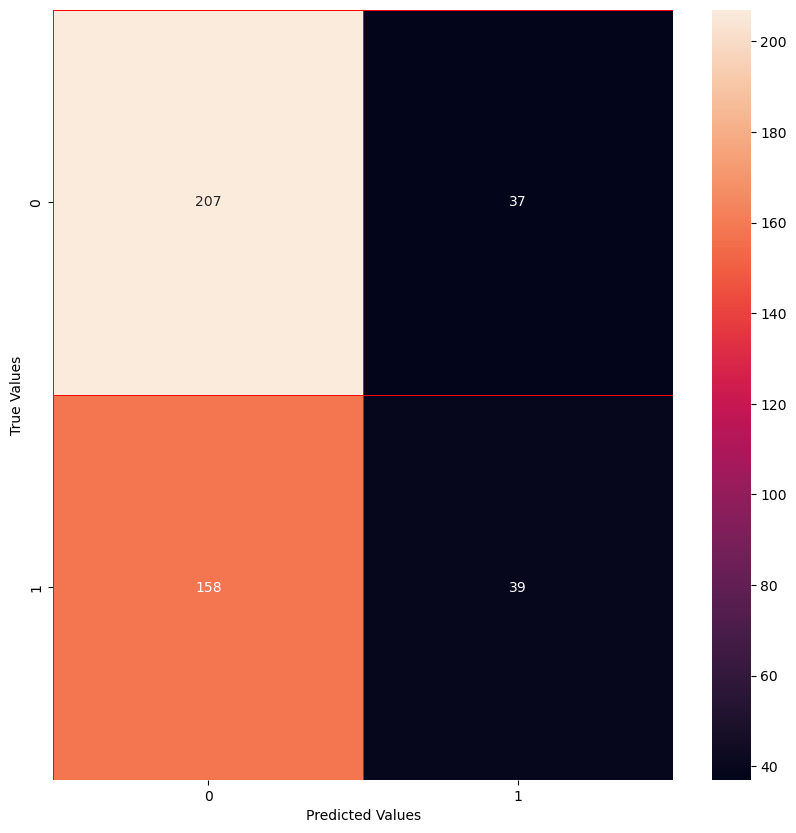

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=26)
svm.fit(X_train, y_train)

print(f'SVM Classification Score is : {svm.score(X_test, y_test)}')
method_names.append('SVM')
method_scores.append(svm.score(X_test, y_test))

SVM Classification Score is : 0.5238095238095238


In [ ]:
print(classification_report(y_test, svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.75      0.64       244
           1       0.44      0.24      0.31       197

    accuracy                           0.52       441
   macro avg       0.50      0.50      0.47       441
weighted avg       0.50      0.52      0.49       441



In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
print(f'Naive Bayes Classification Score : {model.score(X_test, y_test)}')
method_names.append('Naive Bayes')
method_scores.append(model.score(X_test, y_test))

print(classification_report(y_test, model.predict(X_test)))

Naive Bayes Classification Score : 0.5034013605442177
              precision    recall  f1-score   support

           0       0.57      0.41      0.48       244
           1       0.46      0.61      0.52       197

    accuracy                           0.50       441
   macro avg       0.51      0.51      0.50       441
weighted avg       0.52      0.50      0.50       441



In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(f'Decision Tree Classification Score : {model.score(X_test, y_test)}')
method_names.append('Decision Tree')
method_scores.append(model.score(X_test, y_test))

print(classification_report(y_test, model.predict(X_test)))

Decision Tree Classification Score : 0.4897959183673469
              precision    recall  f1-score   support

           0       0.54      0.50      0.52       244
           1       0.44      0.48      0.46       197

    accuracy                           0.49       441
   macro avg       0.49      0.49      0.49       441
weighted avg       0.49      0.49      0.49       441



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
print(f'Randon Forest Classification Score : {model.score(X_test, y_test)}')
method_names.append('Randon Forest')
method_scores.append(model.score(X_test, y_test))

print(classification_report(y_test, model.predict(X_test)))

Randon Forest Classification Score : 0.4875283446712018
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       244
           1       0.41      0.36      0.38       197

    accuracy                           0.49       441
   macro avg       0.47      0.47      0.47       441
weighted avg       0.48      0.49      0.48       441



In [ ]:
method_names, method_scores

(['Logistic Reg.',
  'SVM',
  'SVM',
  'SVM',
  'SVM',
  'Naive Bayes',
  'Naive Bayes',
  'Decision Tree',
  'Randon Forest'],
 [0.5578231292517006,
  0.5238095238095238,
  0.5238095238095238,
  0.5238095238095238,
  0.5238095238095238,
  0.5034013605442177,
  0.5034013605442177,
  0.4897959183673469,
  0.4875283446712018])

In [ ]:
import FinanceDataReader as fdr

In [ ]:
usdkrw = fdr.DataReader('USD/KRW', '2017-10-03', '2023-10-03')
usdkrw

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-03,1142.819946,1149.089966,1140.035034,1142.300049,1142.300049,0.0
2017-10-04,1142.109985,1142.760010,1137.109985,1141.969971,1141.969971,0.0
2017-10-05,1142.260010,1143.030029,1136.329956,1142.300049,1142.300049,0.0
2017-10-06,1141.959961,1145.949951,1138.599976,1141.979980,1141.979980,0.0
2017-10-09,1143.969971,1144.849976,1141.324951,1143.699951,1143.699951,0.0
...,...,...,...,...,...,...
2023-09-26,1338.449951,1355.000000,1337.430054,1338.449951,1338.449951,0.0
2023-09-27,1353.750000,1357.290039,1347.250000,1353.750000,1353.750000,0.0
2023-09-28,1352.819946,1356.680054,1347.180054,1352.819946,1352.819946,0.0


In [ ]:
raw_df

,date,positive,negative,po_ne_rate,Open,High,Low,Close,Volume,Change
0,2017-10-10,20.10087,1.24346,16.165273,259500,265000,256500,261500,553226,0.007707
1,2017-10-11,21.11875,1.25047,16.888650,259000,260500,256500,259000,249487,-0.009560
2,2017-10-12,21.01788,1.24369,16.899613,258000,262000,254500,254500,179632,-0.017375
3,2017-10-13,18.11095,1.33386,13.577849,256000,273000,253500,271000,681271,0.064833
4,2017-10-16,21.09124,1.73005,12.191116,273500,286000,271000,285000,581424,0.051661
...,...,...,...,...,...,...,...,...,...,...
1469,2023-09-21,21.74232,1.41609,15.353770,123500,124200,121700,122600,126722,-0.008892
1470,2023-09-22,19.80742,0.96968,20.426759,121600,122000,119000,121800,97100,-0.006525
1471,2023-09-25,21.55891,0.91315,23.609385,121800,125600,121100,124900,194926,0.025452
1472,2023-09-26,20.98120,0.96664,21.705288,123300,124500,121100,122500,153382,-0.019215


In [ ]:
jp225 = fdr.DataReader('CSI300', '2017-10-03', '2023-10-03')
jp225

HTTP Error 404: Not Found  - symbol "CSI300"not found or invalid periods


""


In [ ]:
ssec = fdr.DataReader('SSEC', '2017-10-03', '2023-10-03') # 상해 종합지수 Shanghai (SSEC -Shanghai Composite)
hsi = fdr.DataReader('HSI', '2017-10-03', '2023-10-03') # 항셍지수 (HSI - Hang Seng)
n225 = fdr.DataReader('N225', '2017-10-03', '2023-10-03') # 일본 닛케이지수 (N225 - Nikkei 225)
ftse = fdr.DataReader('FTSE', '2017-10-03', '2023-10-03') # 영국 FTSE100 (FTSE 100 - Financial Times Stock Exchange)
fchi = fdr.DataReader('FCHI', '2017-10-03', '2023-10-03') # 프랑스 FCHI 지수 (CAC 40 - CAC quarante)
gdaxi = fdr.DataReader('GDAXI', '2017-10-03', '2023-10-03') # 독일 닥스지수  (DAX30 - germany-30)

In [ ]:
ssec

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-09,3403.246094,3410.169922,3366.965088,3374.377930,3374.377930,191700
2017-10-10,3373.344971,3384.025879,3358.794922,3382.988037,3382.988037,179400
2017-10-11,3381.488037,3395.779053,3379.163086,3388.283936,3388.283936,181500
2017-10-12,3385.532959,3390.204102,3372.532959,3386.100098,3386.100098,161800
2017-10-13,3384.488037,3395.748047,3383.239014,3390.522949,3390.522949,140000
...,...,...,...,...,...,...
2023-09-22,3084.757080,3132.558105,3078.801025,3132.431885,3132.431885,286000
2023-09-25,3131.208008,3131.208008,3112.150879,3115.606934,3115.606934,258100
2023-09-26,3114.020996,3120.289063,3102.272949,3102.272949,3102.272949,222600


In [ ]:

# KRX Indices 국내 지수 데이터
ks11 = fdr.DataReader('KS11', '2017-10-03', '2023-10-03') # KOSPI 지수 (KRX)
kq11 = fdr.DataReader('KQ11', '2017-10-03', '2023-10-03') # KOSDAQ 지수 (KRX)
ks200 = fdr.DataReader('KS200', '2017-10-03', '2023-10-03') # KOSPI 200 (KRX)

# US market Indices 미국 시장 지수 데이터
dji = fdr.DataReader('DJI', '2017-10-03', '2023-10-03') # 다우존스 지수 (DJI - Dow Jones Industrial Average)
ixic = fdr.DataReader('IXIC', '2017-10-03', '2023-10-03') # 나스닥 종합지수 (IXIC - NASDAQ Composite)
us500 = fdr.DataReader('US500', '2017-10-03', '2023-10-03') # S&P 500 지수 (NYSE)
rut = fdr.DataReader('RUT', '2017-10-03', '2023-10-03') # 러셀2000 지수 (RUT - US Small Cap 2000)
vtx = fdr.DataReader('VIX', '2017-10-03', '2023-10-03') # VIX지수 (VIX - CBOE Volatility Index)

# Global Indices 글로벌 지수 데이터
ssec = fdr.DataReader('SSEC', '2017-10-03', '2023-10-03') # 상해 종합지수 Shanghai (SSEC -Shanghai Composite)
hsi = fdr.DataReader('HSI', '2017-10-03', '2023-10-03') # 항셍지수 (HSI - Hang Seng)
n225 = fdr.DataReader('N225', '2017-10-03', '2023-10-03') # 일본 닛케이지수 (N225 - Nikkei 225)
ftse = fdr.DataReader('FTSE', '2017-10-03', '2023-10-03') # 영국 FTSE100 (FTSE 100 - Financial Times Stock Exchange)
fchi = fdr.DataReader('FCHI', '2017-10-03', '2023-10-03') # 프랑스 FCHI 지수 (CAC 40 - CAC quarante)
gdaxi = fdr.DataReader('GDAXI', '2017-10-03', '2023-10-03') # 독일 닥스지수  (DAX30 - germany-30)

# KRX stock price 국내 시장 개별종목
bioland = fdr.DataReader('052260', '2017-10-03', '2023-10-03') # 현대바이오랜드

# 상품 선물 가격 데이터
cl_F = fdr.DataReader('CL=F', '2017-10-03', '2023-10-03') # WTI유 선물 Crude Oil (NYMEX)
bz_f = fdr.DataReader('BZ=F', '2017-10-03', '2023-10-03') # 브렌트유 선물 Brent Oil (NYMEX)
ng_f = fdr.DataReader('NG=F', '2017-10-03', '2023-10-03') # 천연가스 선물 (NYMEX)
gc_f = fdr.DataReader('GC=F', '2017-10-03', '2023-10-03') # 금 선물 (COMEX)
si_f = fdr.DataReader('SI=F', '2017-10-03', '2023-10-03') # 은 선물 (COMEX)
hg_f = fdr.DataReader('HG=F', '2017-10-03', '2023-10-03') # 구리 선물 (COMEX)

# 환율: 여러 조합 가능(지원 심볼: ['KRW', 'EUR', 'CNY', 'JPY', 'CHF'])
usd_krw = fdr.DataReader('USD/KRW', '2017-10-03', '2023-10-03') # 달러 원화

# 암호화폐 가격 데이터 (원화, 달러)
# (지원 심볼: ['BTC', 'ETH', 'USDT', 'BNB', 'USDC', 'XRP', 'BUSD', 'ADA', 'SOL', 'DOGE'])
btc = fdr.DataReader('BTC/KRW', '2017-10-03', '2023-10-03') # 비트코인/원화
eth = fdr.DataReader('ETH/KRW', '2017-10-03', '2023-10-03') # 이더리움/원화

# 미국 국채 채권 수익률
us5yt = fdr.DataReader('US5YT', '2017-10-03', '2023-10-03')   # 5년 만기 미국국채 수익률
us10yt = fdr.DataReader('US10YT', '2017-10-03', '2023-10-03') # 10년 만기 미국국채 수익률
us30yt = fdr.DataReader('US30YT', '2017-10-03', '2023-10-03') # 30년 만기 미국국채 수익률

In [ ]:
usd_krw

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-03,1142.819946,1149.089966,1140.035034,1142.300049,1142.300049,0.0
2017-10-04,1142.109985,1142.760010,1137.109985,1141.969971,1141.969971,0.0
2017-10-05,1142.260010,1143.030029,1136.329956,1142.300049,1142.300049,0.0
2017-10-06,1141.959961,1145.949951,1138.599976,1141.979980,1141.979980,0.0
2017-10-09,1143.969971,1144.849976,1141.324951,1143.699951,1143.699951,0.0
...,...,...,...,...,...,...
2023-09-26,1338.449951,1355.000000,1337.430054,1338.449951,1338.449951,0.0
2023-09-27,1353.750000,1357.290039,1347.250000,1353.750000,1353.750000,0.0
2023-09-28,1352.819946,1356.680054,1347.180054,1352.819946,1352.819946,0.0


In [ ]:
# Day3
import numpy as np
import pandas as pd

raw_df = pd.read_csv('./raw_df.csv')
raw_df.drop('Unnamed: 0', axis=1, inplace=True)
raw_df

,date,positive,negative,po_ne_rate,Open,High,Low,Close,Volume,Change
0,2017-10-10,20.10087,1.24346,16.165273,259500,265000,256500,261500,553226,0.007707
1,2017-10-11,21.11875,1.25047,16.888650,259000,260500,256500,259000,249487,-0.009560
2,2017-10-12,21.01788,1.24369,16.899613,258000,262000,254500,254500,179632,-0.017375
3,2017-10-13,18.11095,1.33386,13.577849,256000,273000,253500,271000,681271,0.064833
4,2017-10-16,21.09124,1.73005,12.191116,273500,286000,271000,285000,581424,0.051661
...,...,...,...,...,...,...,...,...,...,...
1469,2023-09-21,21.74232,1.41609,15.353770,123500,124200,121700,122600,126722,-0.008892
1470,2023-09-22,19.80742,0.96968,20.426759,121600,122000,119000,121800,97100,-0.006525
1471,2023-09-25,21.55891,0.91315,23.609385,121800,125600,121100,124900,194926,0.025452
1472,2023-09-26,20.98120,0.96664,21.705288,123300,124500,121100,122500,153382,-0.019215


In [ ]:
# 전처리

df = raw_df.copy(deep=True)

df_filter = raw_df['Close'].pct_change() * 100
df_filter.rename('today', inplace=True)

df_filter.index = raw_df['date']
df_filter = df_filter.reset_index()

df_filter['date'] = pd.to_datetime(df_filter['date'])

df_filter['Volume'] = df['Volume'].shift(1).values / 1000

for i in range(1, 6):
    df_filter['Lag' + str(i)] = df_filter['today'].shift(i)

df_filter['positive'] = df['positive'].shift(1).values
df_filter['negative'] = df['negative'].shift(1).values
df_filter['po_ne_rate'] = df['po_ne_rate'].shift(1).values

df_filter.dropna(inplace=True)
df_filter['Direction'] = [1 if i > 0 else 0 for i in df_filter['today']]
df_filter

,date,today,Volume,Lag1,Lag2,Lag3,Lag4,Lag5,positive,negative,po_ne_rate,Direction
6,2017-10-18,-0.698080,268.147,0.526316,5.166052,6.483301,-1.737452,-0.956023,19.58734,1.37872,14.206902,0
7,2017-10-19,0.702988,273.989,-0.698080,0.526316,5.166052,6.483301,-1.737452,19.52315,1.31704,14.823506,1
8,2017-10-20,-2.094241,149.101,0.702988,-0.698080,0.526316,5.166052,6.483301,20.34846,1.31751,15.444634,0
9,2017-10-23,0.178253,105.672,-2.094241,0.702988,-0.698080,0.526316,5.166052,18.29436,1.17408,15.581868,1
10,2017-10-24,3.914591,121.854,0.178253,-2.094241,0.702988,-0.698080,0.526316,19.66987,1.27500,15.427349,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1469,2023-09-21,-0.889248,137.909,-1.825397,-1.792673,-0.155642,1.260835,-0.314218,21.95323,1.28738,17.052642,0
1470,2023-09-22,-0.652529,126.722,-0.889248,-1.825397,-1.792673,-0.155642,1.260835,21.74232,1.41609,15.353770,0
1471,2023-09-25,2.545156,97.100,-0.652529,-0.889248,-1.825397,-1.792673,-0.155642,19.80742,0.96968,20.426759,1
1472,2023-09-26,-1.921537,194.926,2.545156,-0.652529,-0.889248,-1.825397,-1.792673,21.55891,0.91315,23.609385,0


In [ ]:
import FinanceDataReader as fdr

# KRX Indices 국내 지수 데이터
ks11 = fdr.DataReader('KS11', '2017-10-03', '2023-10-03') # KOSPI 지수 (KRX)
kq11 = fdr.DataReader('KQ11', '2017-10-03', '2023-10-03') # KOSDAQ 지수 (KRX)
ks200 = fdr.DataReader('KS200', '2017-10-03', '2023-10-03') # KOSPI 200 (KRX)

# US market Indices 미국 시장 지수 데이터
dji = fdr.DataReader('DJI', '2017-10-03', '2023-10-03') # 다우존스 지수 (DJI - Dow Jones Industrial Average)
ixic = fdr.DataReader('IXIC', '2017-10-03', '2023-10-03') # 나스닥 종합지수 (IXIC - NASDAQ Composite)
us500 = fdr.DataReader('US500', '2017-10-03', '2023-10-03') # S&P 500 지수 (NYSE)
rut = fdr.DataReader('RUT', '2017-10-03', '2023-10-03') # 러셀2000 지수 (RUT - US Small Cap 2000)
vtx = fdr.DataReader('VIX', '2017-10-03', '2023-10-03') # VIX지수 (VIX - CBOE Volatility Index)

# Global Indices 글로벌 지수 데이터
ssec = fdr.DataReader('SSEC', '2017-10-03', '2023-10-03') # 상해 종합지수 Shanghai (SSEC -Shanghai Composite)
hsi = fdr.DataReader('HSI', '2017-10-03', '2023-10-03') # 항셍지수 (HSI - Hang Seng)
n225 = fdr.DataReader('N225', '2017-10-03', '2023-10-03') # 일본 닛케이지수 (N225 - Nikkei 225)
ftse = fdr.DataReader('FTSE', '2017-10-03', '2023-10-03') # 영국 FTSE100 (FTSE 100 - Financial Times Stock Exchange)
fchi = fdr.DataReader('FCHI', '2017-10-03', '2023-10-03') # 프랑스 FCHI 지수 (CAC 40 - CAC quarante)
gdaxi = fdr.DataReader('GDAXI', '2017-10-03', '2023-10-03') # 독일 닥스지수  (DAX30 - germany-30)

# KRX stock price 국내 시장 개별종목
bioland = fdr.DataReader('052260', '2017-10-03', '2023-10-03') # 현대바이오랜드

# 상품 선물 가격 데이터
cl_F = fdr.DataReader('CL=F', '2017-10-03', '2023-10-03') # WTI유 선물 Crude Oil (NYMEX)
bz_f = fdr.DataReader('BZ=F', '2017-10-03', '2023-10-03') # 브렌트유 선물 Brent Oil (NYMEX)
ng_f = fdr.DataReader('NG=F', '2017-10-03', '2023-10-03') # 천연가스 선물 (NYMEX)
gc_f = fdr.DataReader('GC=F', '2017-10-03', '2023-10-03') # 금 선물 (COMEX)
si_f = fdr.DataReader('SI=F', '2017-10-03', '2023-10-03') # 은 선물 (COMEX)
hg_f = fdr.DataReader('HG=F', '2017-10-03', '2023-10-03') # 구리 선물 (COMEX)

# 환율: 여러 조합 가능(지원 심볼: ['KRW', 'EUR', 'CNY', 'JPY', 'CHF'])
usd_krw = fdr.DataReader('USD/KRW', '2017-10-03', '2023-10-03') # 달러 원화

# 암호화폐 가격 데이터 (원화, 달러)
# (지원 심볼: ['BTC', 'ETH', 'USDT', 'BNB', 'USDC', 'XRP', 'BUSD', 'ADA', 'SOL', 'DOGE'])
btc = fdr.DataReader('BTC/KRW', '2017-10-03', '2023-10-03') # 비트코인/원화
eth = fdr.DataReader('ETH/KRW', '2017-10-03', '2023-10-03') # 이더리움/원화

# 미국 국채 채권 수익률
us5yt = fdr.DataReader('US5YT', '2017-10-03', '2023-10-03')   # 5년 만기 미국국채 수익률
us10yt = fdr.DataReader('US10YT', '2017-10-03', '2023-10-03') # 10년 만기 미국국채 수익률
us30yt = fdr.DataReader('US30YT', '2017-10-03', '2023-10-03') # 30년 만기 미국국채 수익률

In [ ]:
df_ls = [ks11, kq11, ks200, dji, ixic, us500, rut, vtx, ssec, hsi, n225, ftse, fchi, gdaxi, bioland, cl_F, bz_f, ng_f, gc_f, si_f, hg_f, usd_krw, btc, eth, us5yt, us10yt, us30yt]

In [ ]:
# 변수명을 문자열로 받아오는 방법
foo = dict()
print(f'{foo=}'.split('=')[0])

import inspect

x, y, z = 1, 2, 3

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

print(retrieve_name(y))

foo
['y']


In [ ]:
for df in df_ls:
    add_str = retrieve_name(df)[1]
    cols = list(ks11.columns)

    cols = list(map(lambda x : (add_str + '_' + x), cols))
    print(cols)
    df.columns = cols
    # df.reset_index(inplace=True)

['ks11_Open', 'ks11_High', 'ks11_Low', 'ks11_Close', 'ks11_Adj Close', 'ks11_Volume']
['kq11_ks11_Open', 'kq11_ks11_High', 'kq11_ks11_Low', 'kq11_ks11_Close', 'kq11_ks11_Adj Close', 'kq11_ks11_Volume']
['ks200_ks11_Open', 'ks200_ks11_High', 'ks200_ks11_Low', 'ks200_ks11_Close', 'ks200_ks11_Adj Close', 'ks200_ks11_Volume']
['dji_ks11_Open', 'dji_ks11_High', 'dji_ks11_Low', 'dji_ks11_Close', 'dji_ks11_Adj Close', 'dji_ks11_Volume']
['ixic_ks11_Open', 'ixic_ks11_High', 'ixic_ks11_Low', 'ixic_ks11_Close', 'ixic_ks11_Adj Close', 'ixic_ks11_Volume']
['us500_ks11_Open', 'us500_ks11_High', 'us500_ks11_Low', 'us500_ks11_Close', 'us500_ks11_Adj Close', 'us500_ks11_Volume']
['rut_ks11_Open', 'rut_ks11_High', 'rut_ks11_Low', 'rut_ks11_Close', 'rut_ks11_Adj Close', 'rut_ks11_Volume']
['vtx_ks11_Open', 'vtx_ks11_High', 'vtx_ks11_Low', 'vtx_ks11_Close', 'vtx_ks11_Adj Close', 'vtx_ks11_Volume']
['ssec_ks11_Open', 'ssec_ks11_High', 'ssec_ks11_Low', 'ssec_ks11_Close', 'ssec_ks11_Adj Close', 'ssec_ks11_V

In [ ]:
for df in df_ls:
    col_name = list(df.columns)[3]
    # print(col_name)
    extract_close = df[col_name].shift(1).values
    # print(extract_close)
    extract_df = pd.DataFrame({col_name : extract_close}, index=df[col_name].shift(1).index)
    extract_df.reset_index(inplace=True)
    # print(extract_df.dtypes)
    df_filter = pd.merge(left=df_filter, right=extract_df, left_on='date', right_on='Date')
    df_filter.drop('Date', axis=1, inplace=True)
    # print(df_filter)
    # break
df_filter

,date,today,Volume,Lag1,Lag2,Lag3,Lag4,Lag5,positive,negative,...,ng_f_ks11_Close,gc_f_ks11_Close,si_f_ks11_Close,hg_f_ks11_Close,usd_krw_ks11_Close,btc_ks11_Close,eth_ks11_Close,us5yt_ks11_Close,us10yt_ks11_Close,us30yt_ks11_Close
0,2017-11-13,0.624025,0.000119,-1.080247,-0.460829,1.718750,-0.928793,0.780031,19.50481,1.02154,...,3.213,1272.400024,16.844000,3.0695,1116.849976,6654439.0,3.443581e+05,NaN,NaN,NaN
1,2017-11-14,-0.155039,0.000279,0.624025,-1.080247,-0.460829,1.718750,-0.928793,20.87116,1.44085,...,3.167,1277.300049,17.023001,3.1115,1118.310059,7343087.0,3.545509e+05,2.072,2.400,2.869
2,2017-11-15,-0.776398,0.000204,-0.155039,0.624025,-1.080247,-0.460829,1.718750,22.43924,1.40348,...,3.102,1281.500000,17.052000,3.0600,1119.459961,7404236.0,3.767321e+05,2.065,2.381,2.839
3,2017-11-16,0.000000,0.000158,-0.776398,-0.155039,0.624025,-1.080247,-0.460829,21.42136,1.27079,...,3.080,1276.500000,16.950001,3.0490,1115.770020,8091133.5,3.686995e+05,2.038,2.335,2.781
4,2017-11-17,-1.095462,0.000142,0.000000,-0.776398,-0.155039,0.624025,-1.080247,20.97203,1.11007,...,3.053,1277.400024,17.056000,3.0435,NaN,8632016.0,3.628880e+05,2.065,2.361,2.806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,2023-09-21,-0.889248,0.000138,-1.825397,-1.792673,-0.155642,1.260835,-0.314218,21.95323,1.28738,...,2.733,1945.599976,23.579000,3.7465,1328.530029,36160992.0,2.184115e+06,4.515,4.349,4.401
1235,2023-09-22,-0.652529,0.000127,-0.889248,-1.825397,-1.792673,-0.155642,1.260835,21.74232,1.41609,...,2.610,1919.199951,23.444000,3.6665,1332.339966,36176232.0,2.163868e+06,4.616,4.480,4.552
1236,2023-09-25,2.545156,0.000097,-0.652529,-0.889248,-1.825397,-1.792673,-0.155642,19.80742,0.96968,...,2.637,1925.400024,23.596001,3.6655,1341.170044,35500896.0,2.128844e+06,NaN,NaN,NaN
1237,2023-09-26,-1.921537,0.000195,2.545156,-0.652529,-0.889248,-1.825397,-1.792673,21.55891,0.91315,...,2.639,1916.599976,23.145000,3.6495,1334.660034,35070284.0,2.111488e+06,4.620,4.542,4.658


In [ ]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 0 to 1238
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1239 non-null   datetime64[ns]
 1   today               1239 non-null   float64       
 2   Volume              1239 non-null   float64       
 3   Lag1                1239 non-null   float64       
 4   Lag2                1239 non-null   float64       
 5   Lag3                1239 non-null   float64       
 6   Lag4                1239 non-null   float64       
 7   Lag5                1239 non-null   float64       
 8   positive            1239 non-null   float64       
 9   negative            1239 non-null   float64       
 10  po_ne_rate          1239 non-null   float64       
 11  Direction           1239 non-null   int64         
 12  ks11_Close          1239 non-null   float64       
 13  kq11_ks11_Close     1239 non-null   float64     

In [ ]:
df_drop = df_filter.dropna()

In [ ]:
df_ffill = df_filter.fillna(method='ffill')
df_ffill = df_ffill.dropna()

In [ ]:
df_filter = df_drop.copy(deep=True)

X_cols = list(df_filter.columns)[2:]
X_cols.remove('Direction')
# X_cols
X = df_filter[X_cols]
y = df_filter['Direction']

n = int(X.shape[0] * 0.7)

X_train = X[:n]
X_test = X[n:]

y_train = y[:n]
y_test = y[n:]

method_names = []
method_scores = []

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(f'Logistic Regression Classification Test Accuracy {model.score(X_test, y_test)}')

method_names.append('Logistic Reg.')
method_scores.append(model.score(X_test, y_test))

Logistic Regression Classification Test Accuracy 0.5469798657718121


In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=26)
svm.fit(X_train, y_train)

print(f'SVM Classification Score is : {svm.score(X_test, y_test)}')
method_names.append('SVM')
method_scores.append(svm.score(X_test, y_test))

SVM Classification Score is : 0.5436241610738255


In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
print(f'Naive Bayes Classification Score : {model.score(X_test, y_test)}')
method_names.append('Naive Bayes')
method_scores.append(model.score(X_test, y_test))

Naive Bayes Classification Score : 0.44966442953020136


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(f'Decision Tree Classification Score : {model.score(X_test, y_test)}')
method_names.append('Decision Tree')
method_scores.append(model.score(X_test, y_test))

Decision Tree Classification Score : 0.5335570469798657


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
print(f'Randon Forest Classification Score : {model.score(X_test, y_test)}')
method_names.append('Randon Forest')
method_scores.append(model.score(X_test, y_test))

Randon Forest Classification Score : 0.5637583892617449


In [ ]:
result = dict(zip(method_names, method_scores))
result

{'Logistic Reg.': 0.5469798657718121,
 'SVM': 0.5436241610738255,
 'Naive Bayes': 0.44966442953020136,
 'Decision Tree': 0.5335570469798657,
 'Randon Forest': 0.5637583892617449}

In [ ]:
df_filter = df_ffill.copy(deep=True)

X_cols = list(df_filter.columns)[2:]
X_cols.remove('Direction')
# X_cols
X = df_filter[X_cols]
y = df_filter['Direction']

n = int(X.shape[0] * 0.7)

X_train = X[:n]
X_test = X[n:]

y_train = y[:n]
y_test = y[n:]

method_names = []
method_scores = []

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(f'Logistic Regression Classification Test Accuracy {model.score(X_test, y_test)}')

method_names.append('Logistic Reg.')
method_scores.append(model.score(X_test, y_test))

Logistic Regression Classification Test Accuracy 0.5591397849462365


In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=26)
svm.fit(X_train, y_train)

print(f'SVM Classification Score is : {svm.score(X_test, y_test)}')
method_names.append('SVM')
method_scores.append(svm.score(X_test, y_test))

SVM Classification Score is : 0.5403225806451613


In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
print(f'Naive Bayes Classification Score : {model.score(X_test, y_test)}')
method_names.append('Naive Bayes')
method_scores.append(model.score(X_test, y_test))

Naive Bayes Classification Score : 0.43548387096774194


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(f'Decision Tree Classification Score : {model.score(X_test, y_test)}')
method_names.append('Decision Tree')
method_scores.append(model.score(X_test, y_test))

Decision Tree Classification Score : 0.5483870967741935


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
print(f'Randon Forest Classification Score : {model.score(X_test, y_test)}')
method_names.append('Randon Forest')
method_scores.append(model.score(X_test, y_test))

Randon Forest Classification Score : 0.543010752688172


In [ ]:
result = dict(zip(method_names, method_scores))
result

{'Logistic Reg.': 0.5591397849462365,
 'SVM': 0.5403225806451613,
 'Naive Bayes': 0.43548387096774194,
 'Decision Tree': 0.5483870967741935,
 'Randon Forest': 0.543010752688172}

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_filter = df_drop.copy(deep=True)

X_cols = list(df_filter.columns)[2:]
X_cols.remove('Direction')
# X_cols
X = df_filter[X_cols]
X = ss.fit_transform(X)
y = df_filter['Direction']

n = int(X.shape[0] * 0.7)

X_train = X[:n]
X_test = X[n:]

y_train = y[:n]
y_test = y[n:]

method_names = []
method_scores = []

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(f'Logistic Regression Classification Test Accuracy {model.score(X_test, y_test)}')

method_names.append('Logistic Reg.')
method_scores.append(model.score(X_test, y_test))

Logistic Regression Classification Test Accuracy 0.5436241610738255


In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=26)
svm.fit(X_train, y_train)

print(f'SVM Classification Score is : {svm.score(X_test, y_test)}')
method_names.append('SVM')
method_scores.append(svm.score(X_test, y_test))

SVM Classification Score is : 0.47651006711409394


In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
print(f'Naive Bayes Classification Score : {model.score(X_test, y_test)}')
method_names.append('Naive Bayes')
method_scores.append(model.score(X_test, y_test))

Naive Bayes Classification Score : 0.5268456375838926


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(f'Decision Tree Classification Score : {model.score(X_test, y_test)}')
method_names.append('Decision Tree')
method_scores.append(model.score(X_test, y_test))

Decision Tree Classification Score : 0.5268456375838926


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
print(f'Randon Forest Classification Score : {model.score(X_test, y_test)}')
method_names.append('Randon Forest')
method_scores.append(model.score(X_test, y_test))

Randon Forest Classification Score : 0.5503355704697986


In [ ]:
result = dict(zip(method_names, method_scores))
result

{'Logistic Reg.': 0.5436241610738255,
 'SVM': 0.47651006711409394,
 'Naive Bayes': 0.5268456375838926,
 'Decision Tree': 0.5268456375838926,
 'Randon Forest': 0.5503355704697986}

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_filter = df_ffill.copy(deep=True)

X_cols = list(df_filter.columns)[2:]
X_cols.remove('Direction')
# X_cols
X = df_filter[X_cols]
X = ss.fit_transform(X)
y = df_filter['Direction']

n = int(X.shape[0] * 0.7)

X_train = X[:n]
X_test = X[n:]

y_train = y[:n]
y_test = y[n:]

method_names = []
method_scores = []

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(f'Logistic Regression Classification Test Accuracy {model.score(X_test, y_test)}')

method_names.append('Logistic Reg.')
method_scores.append(model.score(X_test, y_test))

Logistic Regression Classification Test Accuracy 0.48655913978494625


In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=26)
svm.fit(X_train, y_train)

print(f'SVM Classification Score is : {svm.score(X_test, y_test)}')
method_names.append('SVM')
method_scores.append(svm.score(X_test, y_test))

SVM Classification Score is : 0.489247311827957


In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
print(f'Naive Bayes Classification Score : {model.score(X_test, y_test)}')
method_names.append('Naive Bayes')
method_scores.append(model.score(X_test, y_test))

Naive Bayes Classification Score : 0.532258064516129


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(f'Decision Tree Classification Score : {model.score(X_test, y_test)}')
method_names.append('Decision Tree')
method_scores.append(model.score(X_test, y_test))

Decision Tree Classification Score : 0.5376344086021505


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
print(f'Randon Forest Classification Score : {model.score(X_test, y_test)}')
method_names.append('Randon Forest')
method_scores.append(model.score(X_test, y_test))

Randon Forest Classification Score : 0.4838709677419355


In [ ]:
result = dict(zip(method_names, method_scores))
result

{'Logistic Reg.': 0.48655913978494625,
 'SVM': 0.489247311827957,
 'Naive Bayes': 0.532258064516129,
 'Decision Tree': 0.5376344086021505,
 'Randon Forest': 0.4838709677419355}

In [ ]:
# 오늘 종가의 색을 예측해보자.

start_date = '2023-10-01'
end_date = '2023-10-06'
amore = fdr.DataReader('090430', start=start_date, end=end_date)
amore = amore.reset_index()
amore['Date'] = pd.to_datetime(amore['Date'])
amore['positive'] = [84, 85, np.nan]
amore['negative'] = [100, 99, np.nan]
amore['po_ne_rate'] = amore['positive'] / amore['negative']
amore

,Date,Open,High,Low,Close,Volume,Change,positive,negative,po_ne_rate
0,2023-10-04,121000,122700,119600,121700,251821,-0.002459,84.0,100.0,0.840000
1,2023-10-05,122700,122800,120300,121100,130235,-0.004930,85.0,99.0,0.858586
2,2023-10-06,119500,122600,116200,117800,171549,-0.027250,NaN,NaN,NaN


In [ ]:
start_date = '2023-09-01'
end_date = '2023-10-06'
amore2 = fdr.DataReader('090430', start=start_date, end=end_date)
amore2 = amore2.reset_index()
amore2['Date'] = pd.to_datetime(amore2['Date'])

df_filter = amore2['Close'].pct_change() * 100
df_filter.rename('today', inplace=True)
df_filter = df_filter.reset_index()
df_filter['Volume'] = amore2['Volume'].shift(1).values / 1000
df_filter.index = amore2['Date']
df_filter = df_filter.reset_index()
df_filter['Date'] = pd.to_datetime(df_filter['Date'])

for i in range(1, 6):
    df_filter['Lag' + str(i)] = df_filter['today'].shift(i)

amore['positive'] = amore['positive'].shift(1).values
amore['negative'] = amore['negative'].shift(1).values
amore['po_ne_rate'] = amore['po_ne_rate'].shift(1).values

amore = pd.merge(amore[['Date', 'positive', 'negative', 'po_ne_rate']], df_filter, left_on='Date', right_on='Date')

df_filter.dropna(inplace=True)
df_filter['Direction'] = [1 if i > 0 else 0 for i in df_filter['today']]
amore.drop('index', axis=1, inplace=True)
amore = amore[['Date', 'today', 'Volume', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'positive', 'negative', 'po_ne_rate']]
amore

,Date,today,Volume,Lag1,Lag2,Lag3,Lag4,Lag5,positive,negative,po_ne_rate
0,2023-10-04,-0.245902,142.796,-0.408163,-1.921537,2.545156,-0.652529,-0.889248,NaN,NaN,NaN
1,2023-10-05,-0.493016,251.821,-0.245902,-0.408163,-1.921537,2.545156,-0.652529,NaN,NaN,NaN
2,2023-10-06,-2.394715,130.235,-0.493016,-0.245902,-0.408163,-1.921537,2.545156,NaN,NaN,NaN


In [ ]:
amore.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume_x', 'Change',
       'positive', 'negative', 'po_ne_rate', 'index_x', 'today_x', 'Volume_y',
       'Lag1_x', 'Lag2_x', 'Lag3_x', 'Lag4_x', 'Lag5_x', 'index_y', 'today_y',
       'Volume_x', 'Lag1_y', 'Lag2_y', 'Lag3_y', 'Lag4_y', 'Lag5_y', 'index',
       'today', 'Volume_y', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5'],
      dtype='object')